<a href="https://colab.research.google.com/github/unburied/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

haberman.data  sample_data/


In [0]:
df = pd.read_csv('haberman.data')

In [5]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [8]:
!head -n 5 haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1


In [23]:
headers = ['age', 'year_of_op', 'ax_nodes_detected', 'survival_status']
df = pd.read_csv('haberman.data', header = None , names = headers)
df.head()


,age,year_of_op,ax_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [16]:
df.shape[0] == 306

True

In [17]:
df.isna().sum()

age                  0
year_of_op           0
ax_nodes_detected    0
survival_status      0
dtype: int64

In [18]:
df.dtypes

age                  int64
year_of_op           int64
ax_nodes_detected    int64
survival_status      int64
dtype: object

In [28]:
df['survival_status'] = np.where(df['survival_status'] == 1, 1, 0)
df['survival_status'].value_counts()

1    225
0     81
Name: survival_status, dtype: int64

In [27]:
df.head()

,age,year_of_op,ax_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [33]:
df.describe()

,age,year_of_op,ax_nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [35]:
pd.crosstab(df['survival_status'], df['year_of_op'] )

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
survival_status,,,,,,,,,,,,
0,12,9,4,3,7,8,8,13,6,4,3,4
1,24,18,24,23,16,22,23,15,22,21,10,7


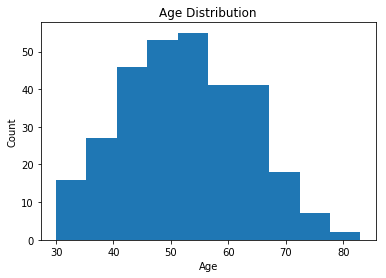

In [44]:
plt.hist(df['age'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

plt.show();

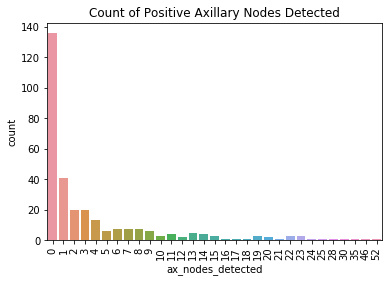

In [52]:
sns.countplot(x = df['ax_nodes_detected'], data = df)

plt.xticks(rotation = 'vertical')
plt.title("Count of Positive Axillary Nodes Detected")
plt.show();


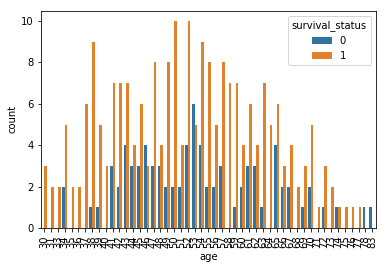

In [59]:
sns.countplot(x= df['age'], hue = df['survival_status'], data = df)
plt.xticks(rotation = 'vertical')
plt.show();


In [0]:
df['age_buckets'] = pd.cut(df['age'], [20,40,50,60,70,80],
                           labels = ['30s-','40s', '50s','60s','70s+'])


In [101]:
pd.crosstab(df['age_buckets'], df['survival_status'], normalize = 'columns')

survival_status,0,1
age_buckets,,
30s-,0.0500,0.173333
40s,0.3625,0.284444
50s,0.3250,0.297778
60s,0.2250,0.200000
70s+,0.0375,0.044444


In [79]:
pd.crosstab(df['year_of_op'], [df['age_buckets'], df['survival_status']])

age_buckets     30s-    40s     50s     60s    70s+   
survival_status    0  1   0   1   0   1   0  1    0  1
year_of_op                                            
58                 0  6   5   5   1   7   5  5    0  1
59                 1  4   2   6   5   3   1  5    0  0
60                 0  9   1   5   2   9   1  1    0  0
61                 0  1   0  10   1   7   2  5    0  0
62                 0  2   2   5   3   5   2  2    0  2
63                 0  5   4   8   2   5   1  3    1  1
64                 0  3   6   6   1  10   1  3    0  1
65                 0  3   3   5   6   2   2  4    2  1
66                 2  2   1   6   2   6   1  8    0  0
67                 0  3   3   5   0   7   1  4    0  2
68                 0  0   0   2   2   1   1  5    0  2
69                 1  1   2   1   1   5   0  0    0  0

In [0]:
df['ax_buckets'] = pd.cut(df['ax_nodes_detected'] , [0, 5, 10, 20, 50] , right= False,
                         labels = ['No Nodes', 'Up to 5', 'Up to 10', '20 or More'])

In [100]:
pd.crosstab(df['survival_status'], df['ax_buckets'], normalize = 'columns')

ax_buckets,No Nodes,Up to 5,Up to 10,20 or More
survival_status,,,,
0,0.182609,0.454545,0.555556,0.533333
1,0.817391,0.545455,0.444444,0.466667


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

- What is at least one feature that looks to have a positive relationship with survival?

The feature that appears to have a positive relationship with survival is the count of positive axillary nodes detected. It appears that the closer the number is to zero, the more likely it was that a patient might survive. Using crosstabulation, I was able to determine that over 83% of survivors had no nodes detected!  

- What is at least one feature that looks to have a negative relationship with survival?

The feature the appers to have a negative relationship with survival is age. Patients in their 40's and 50's look to be more at risk of not surviving the procedure within the first five years when compared to other age groups in the study. These ages groups combine for a nearly 70% non-survivor rate.

In [102]:
df.age_buckets.value_counts()

50s     93
40s     93
60s     63
30s-    43
70s+    13
Name: age_buckets, dtype: int64

In [103]:
df.ax_buckets.value_counts()

No Nodes      230
Up to 5        33
Up to 10       27
20 or More     15
Name: ax_buckets, dtype: int64

In [109]:
pd.crosstab(df['age_buckets'], [df['ax_buckets'], df['survival_status']], normalize = 'all')

ax_buckets       No Nodes             Up to 5            Up to 10            \
survival_status         0         1         0         1         0         1   
age_buckets                                                                   
30s-             0.006579  0.098684  0.003289  0.009868  0.000000  0.016447   
40s              0.049342  0.177632  0.016447  0.016447  0.016447  0.013158   
50s              0.036184  0.184211  0.019737  0.019737  0.019737  0.006579   
60s              0.032895  0.125000  0.009868  0.013158  0.013158  0.003289   
70s+             0.009868  0.032895  0.000000  0.000000  0.000000  0.000000   

ax_buckets      20 or More            
survival_status          0         1  
age_buckets                           
30s-              0.003289  0.003289  
40s               0.009868  0.003289  
50s               0.009868  0.009868  
60s               0.003289  0.006579  
70s+              0.000000  0.000000

- How are those two features related with each other, and what might that mean?

The features are related in that they account for the majority of the population. As can be seen above, patients in their 40's and 50's account for nearly 70% of all patients. And 75% of the population had no nodes detected. This could mean these features have unintentionally more weight.  For example, although most patients with no nodes detected surivived,  this group also accounted for the most patients who did not survive. The same is true for the age groups. Patients in their 40's and 50's accounted for the most non-survivors, but they also include the most survivors among all other groups.  Overall, if you were a patient in you 40's or 50's, and had no positive axillery nodes detected, your were more likley to survive.

